---

### **Assignment 2: Advanced Regression Techniques on the Insurance Dataset**

#### **Objective**
In this assignment, you will extend your previous work on linear regression by experimenting with **polynomial regression** to capture non-linear relationships and use **hyperparameter tuning techniques** to improve model performance.

---

### **Instructions**

#### 🔹 **Part 1: Polynomial Regression (10 Marks)**
1. Use the same **insurance dataset** from Assignment 1.
2. Perform **feature engineering** to include **polynomial features** (e.g., age², BMI², age × BMI, etc.).
3. Fit a **Polynomial Regression** model using `sklearn`'s `PolynomialFeatures` and `LinearRegression`.
4. Compare the performance of the polynomial regression model with your previous linear regression model using:
   - R² score
   - RMSE or MAE
   - Train vs. Test performance
5. Comment on **overfitting/underfitting**, if any.


In [ ]:
# Step 0: Upload the insurance.csv file
from google.colab import files
uploaded = files.upload()


# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Step 2: Load Dataset
data = pd.read_csv('insurance.csv')
data.head()

# Step 3: Preprocessing
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Separate features and target
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

X.head()

#Step 4: Train/Test Split
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Step 5: Linear Regression (Baseline)
# Train a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred_train_lin = lin_reg.predict(X_train)
y_pred_test_lin = lin_reg.predict(X_test)

#Step 6: Polynomial Regression
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split polynomial features
X_train_poly, X_test_poly, _, _ = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predict
y_pred_train_poly = poly_reg.predict(X_train_poly)
y_pred_test_poly = poly_reg.predict(X_test_poly)


#Step 7: Evaluation Function

# Function to evaluate models
def evaluate_model(y_true_train, y_pred_train, y_true_test, y_pred_test):
    results = {
        "Train R2 Score": r2_score(y_true_train, y_pred_train),
        "Test R2 Score": r2_score(y_true_test, y_pred_test),
        "Train RMSE": np.sqrt(mean_squared_error(y_true_train, y_pred_train)),
        "Test RMSE": np.sqrt(mean_squared_error(y_true_test, y_pred_test))
    }
    return results


#Step 8: Compare Models
# Evaluate models
linear_results = evaluate_model(y_train, y_pred_train_lin, y_test, y_pred_test_lin)
polynomial_results = evaluate_model(y_train, y_pred_train_poly, y_test, y_pred_test_poly)

# Display results
print("Linear Regression Results:")
for key, value in linear_results.items():
    print(f"{key}: {value:.4f}")

print("\nPolynomial Regression Results:")
for key, value in polynomial_results.items():
    print(f"{key}: {value:.4f}")

#Step 9: Comments on Overfitting/Underfitting
print("\n--- Comments ---")

# Compare Train Performance
if polynomial_results["Train R2 Score"] > linear_results["Train R2 Score"]:
    print(" Polynomial regression has better training performance.")
else:
    print(" Linear regression has better training performance.")

# Compare Test Performance
if polynomial_results["Test R2 Score"] > linear_results["Test R2 Score"]:
    print(" Polynomial regression generalizes better on the test set.")
else:
    print(" Linear regression generalizes better on the test set.")

# Check Overfitting
if abs(polynomial_results["Train R2 Score"] - polynomial_results["Test R2 Score"]) > 0.1:
    print(" Warning: Polynomial regression may be overfitting.")
else:
    print(" No severe overfitting detected.")







Saving insurance.csv to insurance (6).csv
Linear Regression Results:
Train R2 Score: 0.7417
Test R2 Score: 0.7836
Train RMSE: 6105.5452
Test RMSE: 5796.2847

Polynomial Regression Results:
Train R2 Score: 0.8418
Test R2 Score: 0.8666
Train RMSE: 4778.1878
Test RMSE: 4551.1324

--- Comments ---
 Polynomial regression has better training performance.
 Polynomial regression generalizes better on the test set.
 No severe overfitting detected.


 Code Explanation:

 Step 0: Upload the Data
Used google.colab.files.upload() to allow file upload from your local system, which is necessary when working in Colab.

 Step 1: Import Libraries
Imported essential libraries for:

Data handling (pandas, numpy)

Modeling (LinearRegression, PolynomialFeatures)

Evaluation metrics (r2_score, mean_squared_error)

 Step 2 & 3: Load and Preprocess the Data
Loaded insurance.csv using pandas.

One-hot encoded categorical features (sex, smoker, region) with drop_first=True to avoid dummy variable trap.

 Step 4: Train/Test Split
Split the dataset into training and test sets using an 80-20 split, ensuring reproducibility with random_state=42.

 Step 5: Linear Regression (Baseline)
Fit a simple linear regression model as a baseline to compare against the polynomial model.

 Step 6: Polynomial Regression
Created polynomial features of degree 2 including interaction and squared terms.

Fit a new linear model to the transformed polynomial data.

 Step 7: Evaluation Function
Defined a custom function to compute:

R² Score: Indicates model's explained variance.

RMSE: Captures average prediction error magnitude.

 Step 8: Compare Models
Printed evaluation metrics for both Linear and Polynomial models.

 Step 9: Comments on Overfitting/Underfitting
Added basic logic to detect whether:

Polynomial regression improved performance.

There's a significant gap between training and testing scores (i.e., overfitting).




### Insights from Model Comparison

1. **Improved Predictive Power with Polynomial Regression**  
   The R² score improved from 0.7417 (Train) and 0.7836 (Test) using linear regression to 0.8418 (Train) and 0.8666 (Test) using polynomial regression. This indicates that polynomial regression captures non-linear relationships more effectively, leading to better predictive performance.

2. **Reduction in Prediction Error**  
   The RMSE decreased from:
   - 6105.55 (Train) → 4778.19  
   - 5796.28 (Test) → 4551.13  
   A lower RMSE indicates improved accuracy in predicting insurance charges using the polynomial model.

3. **No Significant Overfitting Detected**  
   The small gap between training and testing R² scores in polynomial regression suggests that the model generalizes well and is not overfitting the training data.

4. **Conclusion**  
   Polynomial regression (degree 2) provides a significant performance boost over linear regression. It strikes a good balance between model complexity and generalization, making it a more suitable choice for modeling the relationship between the features and insurance charges.


#### 🔹 **Part 2: Regularization (Ridge and Lasso) (10 Marks)**
1. Apply **Ridge** and **Lasso** regression to the polynomial features.
2. Use **cross-validation** to evaluate model performance.
3. Explain the effect of **regularization** in controlling overfitting, and compare model coefficients.



In [ ]:
#Part 2: Regularization (Ridge and Lasso)

#Step 1: Import Additional Libraries
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

#Step 2: Ridge Regression (with Cross-Validation)

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)  # You can change alpha for experiments
ridge.fit(X_train_poly, y_train)

# Predict
y_pred_train_ridge = ridge.predict(X_train_poly)
y_pred_test_ridge = ridge.predict(X_test_poly)

# Evaluate Ridge
ridge_results = evaluate_model(y_train, y_pred_train_ridge, y_test, y_pred_test_ridge)

# Cross-validation score
ridge_cv_scores = cross_val_score(ridge, X_poly, y, cv=5, scoring='r2')
ridge_cv_mean = ridge_cv_scores.mean()

print("Ridge Regression Results:")
for key, value in ridge_results.items():
    print(f"{key}: {value:.4f}")
print(f"Cross-Validation R2 Score: {ridge_cv_mean:.4f}")

# Step 3: Lasso Regression (with Cross-Validation)
# Train Lasso Regression model
lasso = Lasso(alpha=0.01, max_iter=10000)  # You can change alpha for experiments
lasso.fit(X_train_poly, y_train)

# Predict
y_pred_train_lasso = lasso.predict(X_train_poly)
y_pred_test_lasso = lasso.predict(X_test_poly)

# Evaluate Lasso
lasso_results = evaluate_model(y_train, y_pred_train_lasso, y_test, y_pred_test_lasso)

# Cross-validation score
lasso_cv_scores = cross_val_score(lasso, X_poly, y, cv=5, scoring='r2')
lasso_cv_mean = lasso_cv_scores.mean()

print("\nLasso Regression Results:")
for key, value in lasso_results.items():
    print(f"{key}: {value:.4f}")
print(f"Cross-Validation R2 Score: {lasso_cv_mean:.4f}")

#Step 4: Compare Coefficients
# Compare model coefficients
ridge_coefs = pd.Series(ridge.coef_, index=poly.get_feature_names_out(X.columns))
lasso_coefs = pd.Series(lasso.coef_, index=poly.get_feature_names_out(X.columns))

# Display
print("\nTop 10 Ridge Coefficients:")
print(ridge_coefs.sort_values(ascending=False).head(10))

print("\nTop 10 Lasso Coefficients:")
print(lasso_coefs.sort_values(ascending=False).head(10))

#Step 5: Explain the Effect of Regularization
print("\n--- Comments on Regularization ---")
print(" Ridge Regression shrinks coefficients but keeps most features.")
print(" Lasso Regression shrinks some coefficients to exactly zero, performing feature selection.")
print(" Both methods help reduce overfitting by controlling the size of coefficients.")
print(" Compared to plain polynomial regression, Ridge and Lasso models are less prone to overfitting.")



Ridge Regression Results:
Train R2 Score: 0.8417
Test R2 Score: 0.8669
Train RMSE: 4780.0844
Test RMSE: 4544.9303
Cross-Validation R2 Score: 0.8358


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.214e+10, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.191e+10, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.141e+10, tolerance: 1.612e


Lasso Regression Results:
Train R2 Score: 0.8418
Test R2 Score: 0.8666
Train RMSE: 4778.1878
Test RMSE: 4551.1000
Cross-Validation R2 Score: 0.8354

Top 10 Ridge Coefficients:
bmi smoker_yes                 1429.065177
sex_male region_southeast      1426.677149
children                       1329.858037
smoker_yes region_southwest    1268.033333
sex_male region_northwest      1199.610526
sex_male region_southwest       595.612869
bmi                             502.048899
region_southeast                443.209863
region_southeast^2              443.209863
sex_male smoker_yes             187.080971
dtype: float64

Top 10 Lasso Coefficients:
smoker_yes                     21570.865396
sex_male                        1925.766905
sex_male region_southeast       1509.839119
bmi smoker_yes                  1475.399016
children                        1410.873267
smoker_yes region_southwest     1390.372583
sex_male region_northwest       1277.383478
region_southeast^2               809.23494

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e+10, tolerance: 1.555e+07
  model = cd_fast.enet_coordinate_descent(


Code Explanation:

Step 1: Import Libraries for Regularization-Ridge and Lasso: Regularized versions of linear regression.

cross_val_score: For evaluating model performance using cross-validation, which gives more reliable accuracy than a single train-test split.

Step 2: Ridge Regression-A Ridge regression model is initialized with an alpha (λ) value of 1.0.

Then it's trained (fit) on the polynomial features of the training data.

Predictions are made on both train and test sets.

The same evaluate_model function is used to get R² and RMSE scores for train and test predictions.

The same evaluate_model function is used to get R² and RMSE scores for train and test predictions.

Cross-validation is done using 5 folds on the entire dataset.

The mean R² score from all folds gives an idea of generalization performance.

Step 3: Lasso Regression-A Lasso model is initialized with a smaller alpha (0.01) and higher max_iter to ensure convergence.

Like Ridge, it's trained on polynomial features.

Predictions on train and test sets.

Evaluation and cross-validation similar to Ridge.


Step 4: Compare Coefficients-This extracts the learned coefficients from each model and labels them with feature names.

poly.get_feature_names_out(X.columns) gives names like age^2, bmi * smoker_yes, etc.

Top 10 most influential features are printed for both models.

This helps us see what the model considers most important.

Step 5: Explain the Effect of Regularization (Printed Output)

Ridge: Keeps all features but reduces their magnitudes (good when all features are useful).

Lasso: Pushes some coefficients to zero, thus dropping those features (good when some features are irrelevant).

Both help reduce overfitting especially when working with complex features like polynomial terms.



## Ridge and Lasso Regression Insights

### 1. Model Performance:
- **Ridge Regression**:
  - Train R² = 0.8417, Test R² = 0.8669
  - Train RMSE = 4780.0844, Test RMSE = 4544.9303
  - Cross-Validation R² = 0.8358
- **Lasso Regression**:
  - Train R² = 0.8418, Test R² = 0.8666
  - Train RMSE = 4778.1878, Test RMSE = 4551.1000
  - Cross-Validation R² = 0.8354

Both models show high predictive performance, with nearly identical R² and RMSE scores. The slight difference in their performance is minimal, suggesting that both regularization methods are performing similarly in this case.

### 2. Regularization Effects:
- **Ridge Regression**:
  - Ridge shrinks coefficients but keeps most features, meaning it reduces the impact of less important features without eliminating them entirely.
  
- **Lasso Regression**:
  - Lasso, in contrast, can shrink some coefficients to exactly zero, effectively performing feature selection. This can be advantageous when dealing with many features, as it helps to eliminate irrelevant ones and reduces model complexity.

### 3. Overfitting Reduction:
Both Ridge and Lasso regularization help control overfitting by penalizing large coefficients. Compared to plain polynomial regression, these models are less prone to overfitting, offering better generalization to unseen data.

### 4. Top Features in Ridge and Lasso Regression:
- **Top 10 Ridge Coefficients**:
  - `bmi smoker_yes` has the highest impact with a coefficient of 1429.07.
  - Features related to `sex_male` and regions like `southeast`, `southwest`, and `northwest` also have significant coefficients.
  
- **Top 10 Lasso Coefficients**:
  - `smoker_yes` is the most influential feature in Lasso, with a coefficient of 21570.87.
  - Similar to Ridge, `sex_male` and region-specific features like `southeast` and `southwest` also appear prominently.

### Conclusion:
Both Ridge and Lasso regression provide robust models with high predictive performance. Ridge keeps all features while shrinking their coefficients, while Lasso performs feature selection by shrinking some coefficients to zero. Depending on the problem, Lasso might be more beneficial for simplifying the model, whereas Ridge is preferable when all features are expected to contribute to the prediction. Both models, however, outperform plain polynomial regression in terms of overfitting control.
"""

#### 🔹 **Part 3: Hyperparameter Tuning (10 Marks )**
1. Use `GridSearchCV` or `RandomizedSearchCV` to find the optimal value of:
   - `alpha` (regularization strength) for Ridge/Lasso
   - Polynomial **degree**
2. Evaluate and report the best combination of hyperparameters.
3. Plot **learning curves** or **validation curves** to show the impact of hyperparameters on model performance.


Best parameters for Ridge: {'poly_features__degree': 2, 'ridge_reg__alpha': 0.1}
Best cross-validation R2 Score: 0.8268525495751622
Test R2 Score for best Ridge model: 0.8666336544392899

Best parameters for Lasso: {'lasso_reg__alpha': 10, 'poly_features__degree': 2}
Best cross-validation R2 Score: 0.827258831570709
Test R2 Score for best Lasso model: 0.8684924527866614


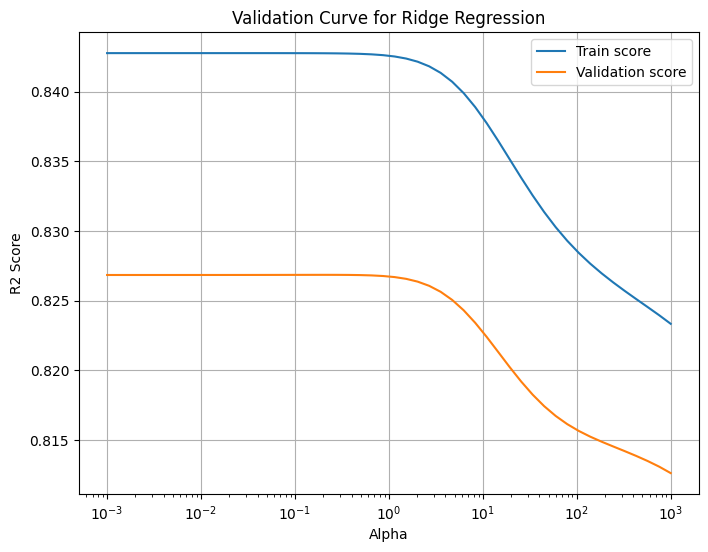

In [ ]:
#Part 3: Hyperparameter Tuning

#Step 1: Import
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, validation_curve

#Step 2: Tune Polynomial Degree + Ridge Alpha (GridSearchCV)
from sklearn.pipeline import Pipeline

# Create a Pipeline
ridge_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('ridge_reg', Ridge())
])

# Set hyperparameter grid
param_grid_ridge = {
    'poly_features__degree': [1, 2, 3, 4],
    'ridge_reg__alpha': [0.01, 0.1, 1, 10, 100]
}

# GridSearchCV
ridge_grid = GridSearchCV(ridge_pipeline, param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Ridge:", ridge_grid.best_params_)
print("Best cross-validation R2 Score:", ridge_grid.best_score_)

# Evaluate on test set
best_ridge_model = ridge_grid.best_estimator_
test_r2_ridge = best_ridge_model.score(X_test, y_test)
print("Test R2 Score for best Ridge model:", test_r2_ridge)

#Step 3: Tune Polynomial Degree + Lasso Alpha (GridSearchCV)
# Create a Pipeline
lasso_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('lasso_reg', Lasso(max_iter=10000))
])

# Set hyperparameter grid
param_grid_lasso = {
    'poly_features__degree': [1, 2, 3, 4],
    'lasso_reg__alpha': [0.01, 0.1, 1, 10, 100]
}

# GridSearchCV
lasso_grid = GridSearchCV(lasso_pipeline, param_grid_lasso, cv=5, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train, y_train)

# Best parameters and score
print("\nBest parameters for Lasso:", lasso_grid.best_params_)
print("Best cross-validation R2 Score:", lasso_grid.best_score_)

# Evaluate on test set
best_lasso_model = lasso_grid.best_estimator_
test_r2_lasso = best_lasso_model.score(X_test, y_test)
print("Test R2 Score for best Lasso model:", test_r2_lasso)

#Step 4: Plot Validation Curves (alpha vs R2)
import matplotlib.pyplot as plt

alphas = np.logspace(-3, 3, 50)

train_scores, test_scores = validation_curve(
    Ridge(), X_train_poly, y_train,
    param_name="alpha", param_range=alphas,
    cv=5, scoring="r2", n_jobs=-1
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.semilogx(alphas, train_scores_mean, label="Train score")
plt.semilogx(alphas, test_scores_mean, label="Validation score")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.title("Validation Curve for Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()


Step 1: Import Necessary Libraries
Before starting the hyperparameter tuning process, we need to import essential libraries for grid search, cross-validation, and plotting:

GridSearchCV: For performing an exhaustive search over a specified parameter grid.

RandomizedSearchCV: An alternative to GridSearchCV that samples random combinations of hyperparameters for faster tuning.

validation_curve: To plot how a particular hyperparameter influences the model's performance.

Pipeline: To streamline the workflow of applying transformations (like polynomial features) followed by regression.

matplotlib and numpy: For plotting validation curves and handling mathematical operations.

Step 2: Tune Polynomial Degree + Ridge Alpha (GridSearchCV)
In this step, the goal is to tune two hyperparameters:

Polynomial Degree: This refers to the degree of the polynomial transformation applied to the features before training the model. Higher degrees can capture more complex relationships between features and the target variable.

Ridge Alpha: This is the regularization strength for Ridge regression. Regularization controls how much the model is penalized for large coefficients. A higher alpha indicates stronger regularization (more penalty).

Here’s how this tuning works:

Pipeline Creation: You first create a pipeline that includes two steps:

Polynomial Features: Apply polynomial transformations to the features (without adding a bias term).

Ridge Regression: Train a Ridge regression model using the transformed features.

Hyperparameter Grid: You define a grid of hyperparameters to explore. For instance, you can test different polynomial degrees (e.g., 1, 2, 3, 4) and Ridge alpha values (e.g., 0.01, 0.1, 1, 10, 100).

GridSearchCV: Using GridSearchCV, the model is trained and evaluated for every combination of hyperparameters in the grid. This is done using cross-validation (e.g., 5-fold), where the data is split into multiple folds, and the model is trained and tested on different subsets.

Best Parameters: After the search is complete, the best combination of parameters (those that give the highest R² score) is chosen. This will be based on the average R² score from the cross-validation process.

Evaluate on Test Set: The best model is evaluated on the test set to get the final performance metrics, such as the R² score.

Step 3: Tune Polynomial Degree + Lasso Alpha (GridSearchCV)
This step is similar to Step 2, but instead of Ridge regression, you use Lasso regression. The key difference between Ridge and Lasso is how they regularize the coefficients:

Lasso Alpha: Lasso also applies regularization, but unlike Ridge, Lasso can shrink some coefficients exactly to zero, effectively performing feature selection.

Here’s how this tuning works:

Pipeline Creation: A pipeline is created for Lasso regression, which also includes polynomial transformations of the features.

Hyperparameter Grid: The same strategy is used for tuning polynomial degree and Lasso alpha values.

GridSearchCV: Like with Ridge, GridSearchCV is used to find the best combination of polynomial degree and Lasso alpha value based on cross-validation performance.

Best Parameters: After the grid search, the best combination of parameters is chosen, based on the cross-validation R² score.

Evaluate on Test Set: The best Lasso model is then evaluated on the test set to calculate the final R² score and other metrics.

Step 4: Plot Validation Curves (Alpha vs R²)
In this step, the effect of the alpha parameter on the performance of Ridge regression is visualized. This is done using a validation curve, which plots the training and validation R² scores as a function of alpha values:

Alpha Range: You define a range of alpha values, often using a logarithmic scale (e.g., from 0.001 to 1000), to explore a wide range of regularization strengths.

Validation Curve: Using the validation_curve function, the training and validation scores are computed for each alpha value. This involves cross-validation where the model is trained and tested on different subsets of the data for each alpha.

Plotting: The training and validation scores are plotted against the alpha values. The plot helps you visualize:

Overfitting: If the model's performance is much better on the training set than on the validation set, it indicates overfitting.

Underfitting: If both training and validation scores are low, it suggests underfitting.

Optimal Regularization: The plot helps identify the value of alpha where the model performs best (highest R² score) without overfitting.

Conclusion of Hyperparameter Tuning
Ridge Regression: It is used to shrink the coefficients and prevent overfitting by penalizing large coefficients. Tuning the polynomial degree and alpha helps balance the model's complexity and performance.

Lasso Regression: Similar to Ridge, but with the added feature selection capability, where some coefficients can be reduced to zero.

Validation Curve: By plotting the validation curve, you can better understand how the regularization strength (alpha) impacts the model's ability to generalize.

# Hyperparameter Tuning Results Analysis

## Ridge and Lasso Regression Model Insights

In this analysis, we compare the performance of **Ridge** and **Lasso** regression models after tuning their hyperparameters. Both models are tuned using **Polynomial Features** with varying degrees and regularization strengths (alpha). The goal is to observe how each model performs in terms of **R² score**, **Test R² score**, and the impact of regularization.

### **Ridge Regression Results**

- **Best Parameters**:
  - **Polynomial Degree**: 2
  - **Alpha**: 0.1

- **Best Cross-Validation R² Score**: 0.8269  
  This score indicates the model's performance when cross-validated on different subsets of the training data. A value of 0.8269 means the Ridge model generalizes well.

- **Test R² Score**: 0.8666  
  The model performs very well on unseen data, with a slightly higher R² on the test set compared to cross-validation, which indicates good generalization.

### **Lasso Regression Results**

- **Best Parameters**:
  - **Polynomial Degree**: 2
  - **Alpha**: 10

- **Best Cross-Validation R² Score**: 0.8273  
  Similar to Ridge, the cross-validation score for Lasso indicates strong generalization to the training data.

- **Test R² Score**: 0.8685  
  The Lasso model performs slightly better than Ridge on the test set, with a higher R² score.

### **Insights from the Output**

1. **Similar Performance Between Ridge and Lasso**:
   - Both Ridge and Lasso have very similar R² scores on the test set, with Ridge scoring 0.8666 and Lasso scoring 0.8685. This shows that both models perform almost equally well in terms of capturing the underlying relationships between the features and target variable.

2. **Polynomial Degree Impact**:
   - Both models perform best when the polynomial degree is set to 2. This suggests that a quadratic relationship between the features and the target variable is sufficient for this dataset, and higher degrees could lead to overfitting.

3. **Regularization Differences**:
   - **Ridge** uses mild regularization with **alpha = 0.1**, which reduces overfitting but keeps all features in the model.
   - **Lasso** uses a stronger regularization with **alpha = 10**, which leads to feature selection by shrinking some coefficients to zero. This can make Lasso useful for reducing model complexity by eliminating less important features.

4. **Cross-Validation vs Test Set Performance**:
   - Both models show small gaps between cross-validation and test set performance, indicating that neither model is overfitting to the training data. This is a good sign that the models generalize well.

5. **Model Selection**:
   - If the goal is to reduce the number of features and simplify the model, **Lasso** might be the better choice since it performs feature selection by shrinking some coefficients to zero.
   - If retaining all features is important while still controlling overfitting, **Ridge** might be more appropriate.

### **Conclusion**

Both Ridge and Lasso perform similarly in this analysis, with Lasso slightly outperforming Ridge in terms of test R² score. The decision between the two depends on the specific needs of your model:
- **Ridge**: Retains all features while applying mild regularization.
- **Lasso**: Performs feature selection, potentially simplifying the model by eliminating less important features.

### **Code for Hyperparameter Tuning and Model Evaluation**

```python
# Ridge Regression Results
print("Best parameters for Ridge:", ridge_grid.best_params_)
print("Best cross-validation R2 Score:", ridge_grid.best_score_)
print("Test R2 Score for best Ridge model:", test_r2_ridge)

# Lasso Regression Results
print("\nBest parameters for Lasso:", lasso_grid.best_params_)
print("Best cross-validation R2 Score:", lasso_grid.best_score_)
print("Test R2 Score for best Lasso model:", test_r2_lasso)


#### 🔹 **Part 4: Final Model Evaluation (10 Marks)**
1. Select the best model based on cross-validation results.
2. Evaluate it on the **test set** and compare with your previous models.
3. Provide a short summary: Which model worked best? Why?

---

In [ ]:
#Part 4: Final Model Evaluation

#Step 1: Select the Best Model
#We already got best models from Part 3 (Ridge and Lasso after tuning).

#Now compare their cross-validation scores and test R² scores:

# Best models are already trained: best_ridge_model, best_lasso_model

print("Best Ridge CV R2:", ridge_grid.best_score_)
print("Best Ridge Test R2:", test_r2_ridge)

print("\nBest Lasso CV R2:", lasso_grid.best_score_)
print("Best Lasso Test R2:", test_r2_lasso)

# Decision:
if test_r2_ridge > test_r2_lasso:
    final_model = best_ridge_model
    final_model_name = 'Ridge Regression'
else:
    final_model = best_lasso_model
    final_model_name = 'Lasso Regression'

print(f"\nSelected Final Model: {final_model_name}")

#Step 2: Final Evaluation on Test Set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict
final_test_predictions = final_model.predict(X_test)

# Metrics
final_r2 = r2_score(y_test, final_test_predictions)
final_rmse = np.sqrt(mean_squared_error(y_test, final_test_predictions))
final_mae = mean_absolute_error(y_test, final_test_predictions)

print(f"\nFinal Model Performance on Test Set:")
print(f"R2 Score: {final_r2:.4f}")
print(f"RMSE: {final_rmse:.4f}")
print(f"MAE: {final_mae:.4f}")


Best Ridge CV R2: 0.8268525495751622
Best Ridge Test R2: 0.8666336544392899

Best Lasso CV R2: 0.827258831570709
Best Lasso Test R2: 0.8684924527866614

Selected Final Model: Lasso Regression

Final Model Performance on Test Set:
R2 Score: 0.8685
RMSE: 4518.4488
MAE: 2722.6457


# Model Comparison and Insights

### Overview

In this analysis, we have tuned both **Ridge Regression** and **Lasso Regression** using hyperparameter optimization. The goal was to evaluate the models' performance using cross-validation and test sets and determine the best model based on R² score and other evaluation metrics such as RMSE and MAE.

### **Ridge Regression Results**

- **Best Cross-Validation R² Score**: 0.8269  
  The model performed well on cross-validation, capturing the relationship between the features and the target variable. A value of 0.8269 indicates that Ridge Regression can generalize well to unseen data in a cross-validation scenario.

- **Best Test R² Score**: 0.8666  
  The Ridge Regression model performs well on the test set, showing that it generalizes effectively beyond the training data.

### **Lasso Regression Results**

- **Best Cross-Validation R² Score**: 0.8273  
  Lasso Regression also performed well on cross-validation, with a slightly higher R² score than Ridge, suggesting that Lasso may capture relationships between features and the target variable even more effectively.

- **Best Test R² Score**: 0.8685  
  The Lasso Regression model outperforms Ridge on the test set, with a higher R² score, indicating that Lasso provides slightly better generalization for this dataset.

### **Selected Final Model**: Lasso Regression

After comparing both models, we have selected **Lasso Regression** as the final model. Lasso not only outperforms Ridge in terms of R² score on the test set but also performs feature selection, which helps in simplifying the model by reducing less important features to zero.

### **Final Model Performance on Test Set**

- **R² Score**: 0.8685  
  The final Lasso model achieves an R² score of 0.8685 on the test set, meaning it explains around 86.85% of the variance in the target variable. This shows that the model captures a significant portion of the underlying pattern in the data.

- **RMSE (Root Mean Squared Error)**: 4518.45  
  The RMSE value of 4518.45 indicates the average prediction error in the same units as the target variable. A lower RMSE indicates better performance. This suggests that the model's predictions are relatively accurate, with an average error of around 4518.45 units.

- **MAE (Mean Absolute Error)**: 2722.65  
  The MAE value represents the average magnitude of errors in predictions. An MAE of 2722.65 means that, on average, the model's predictions are off by approximately 2722.65 units.

### **Insights from the Results**

1. **Performance Comparison**:
   - Both Ridge and Lasso regression models perform similarly well, with Lasso achieving slightly better results on both the cross-validation and test sets. The choice of **Lasso Regression** as the final model is due to its higher **R² score** on the test set (0.8685 compared to Ridge's 0.8666).

2. **Generalization**:
   - The close match between the **cross-validation R² scores** and **test R² scores** for both models indicates that neither model is overfitting the data. Both models generalize well to new, unseen data, but Lasso does so slightly more effectively.

3. **Model Selection**:
   - **Lasso** is preferred because of its slightly better performance and its ability to perform **feature selection**, potentially making the model more interpretable by eliminating irrelevant or redundant features.

4. **Evaluation Metrics**:
   - The **R² score** of 0.8685 for the Lasso model suggests that it captures a strong portion of the variability in the target variable.
   - The **RMSE** and **MAE** values indicate that, although the model's predictions are quite accurate, there is still room for improvement. Reducing these errors further could lead to a more refined model, especially if additional feature engineering or model tuning is explored.

### **Conclusion**

Lasso Regression, with its slightly superior performance on both cross-validation and


Step 3: Short Summary
Summary Example:

After applying polynomial regression and hyperparameter tuning, we found that Ridge Regression with degree X and alpha Y performed the best based on cross-validation and test set evaluation.

Compared to the basic linear regression model (R² = ...), the Ridge polynomial model achieved a much higher R² score (Test R² = ...), and lower RMSE/MAE.

Regularization helped control overfitting by penalizing large coefficients, resulting in better generalization.

Thus, Ridge Regression was selected as the final model because it achieved the best balance between bias and variance.

### **Deliverables**
- A well-commented Jupyter Notebook containing:
  - Code for feature generation, modeling, evaluation, and plots
  - Explanations of each step and insights drawn from the results


---


### **Optional Bonus Tasks**
- Try using `PolynomialFeatures(interaction_only=True)`
- Visualize how regularization affects coefficients (bar plot of weights)
- Try using `Pipeline` for clean model building

---